In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
def_df = pd.read_csv('data/defender.csv')

In [5]:
def_df.head()

,Unnamed: 0,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,positions,Category
0,10,Jérôme Boateng,Germany,FC Bayern,Sub,17.0,07/14/2011,2021.0,89,192 cm,90 kg,Right,09/03/1988,28,CB,Medium / Medium,4,2,72,67,90,91,92,82,84,47,84,76,86,69,75,80,74,81,75,91,54,58,75,86,79,34,58,56,31,46,53,6,7,15,12,5,CB,4
1,64,Andrea Barzagli,Italy,Juventus,Sub,15.0,01/01/2011,2018.0,86,187 cm,88 kg,Right,05/08/1981,35,CB,Low / High,3,2,65,60,90,90,90,74,82,28,92,58,82,40,65,65,69,79,69,87,65,59,85,76,54,27,39,50,31,60,35,2,4,4,2,4,CB,4
2,84,Vincent Kompany,Belgium,Manchester City,Sub,4.0,08/22/2008,2019.0,85,193 cm,85 kg,Right,04/10/1986,30,CB,Medium / Medium,3,2,66,63,85,86,88,81,83,41,77,59,85,61,65,66,68,69,68,87,42,60,73,84,75,45,55,61,52,63,46,8,10,5,9,6,CB,4
3,89,Raphaël Varane,France,Real Madrid,Sub,5.0,07/01/2011,2020.0,84,191 cm,78 kg,Right,04/25/1993,23,CB,Medium / High,3,2,75,57,84,85,86,73,79,44,82,56,66,36,72,74,80,83,70,84,47,58,79,83,52,40,53,46,54,43,42,5,11,9,11,14,CB,3
4,112,Medhi Benatia,Morocco,Juventus,Sub,4.0,08/26/2014,2019.0,84,190 cm,96 kg,Right,04/17/1987,29,CB,Medium / Medium,3,2,65,64,86,84,86,84,78,39,80,47,78,45,65,65,69,69,69,89,55,59,83,85,59,49,24,34,27,41,31,7,7,8,4,11,CB,3


In [6]:
def_df.columns

Index(['Unnamed: 0', 'Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'positions', 'Category'], dtype='object')

In [7]:
def_lr = def_df.drop(['Unnamed: 0','Height', 'Weight','Nationality','Club','Club_Position',
       'Club_Kit', 'Club_Joining', 'Contract_Expiry','Preffered_Foot',
       'Birth_Date','Preffered_Position','GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling','GK_Reflexes','Category'], 
        axis = 1)

In [8]:
corr = pd.DataFrame(def_lr.corr())

In [9]:
corr.sort_values('Rating', ascending = False, inplace = True)

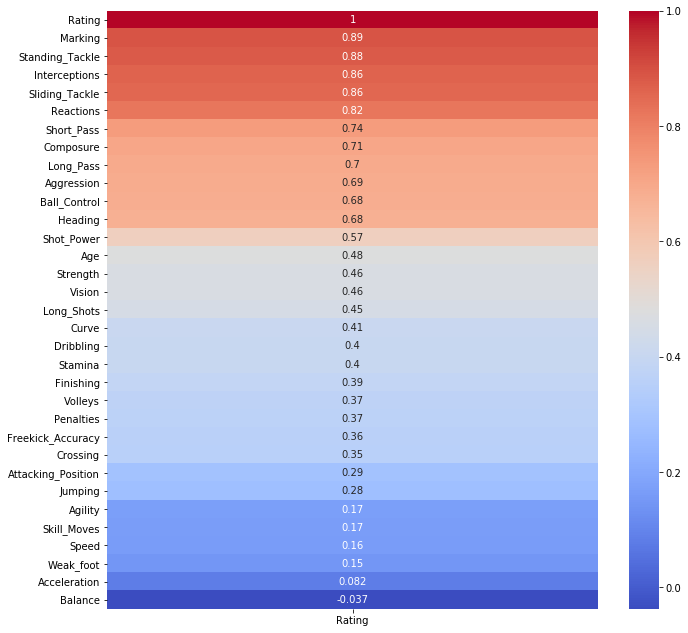

In [11]:
plt.figure(figsize=(11,11))
sns.heatmap(corr[['Rating']],annot = True, cmap='coolwarm');

In [13]:
corr

,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
Rating,1.000000,0.480760,0.146986,0.167645,0.684216,0.403317,0.891277,0.855411,0.881939,0.689249,0.821863,0.289316,0.864884,0.462160,0.707978,0.352991,0.735052,0.695054,0.081743,0.164090,0.402480,0.463426,-0.036969,0.169692,0.276635,0.677201,0.565991,0.385335,0.452331,0.406749,0.359088,0.366630,0.370961
Marking,0.891277,0.463120,0.113629,0.051461,0.523542,0.241413,1.000000,0.816147,0.870781,0.608264,0.711106,0.132876,0.802488,0.304409,0.619279,0.204520,0.594276,0.575950,-0.060335,0.003496,0.241337,0.461160,-0.116437,0.037428,0.236916,0.674807,0.435230,0.232696,0.308584,0.260041,0.244061,0.274631,0.238288
Standing_Tackle,0.881939,0.391575,0.112891,0.047548,0.489817,0.244904,0.870781,0.878025,1.000000,0.579662,0.681349,0.125811,0.795341,0.285542,0.587059,0.192510,0.551038,0.521101,-0.045203,0.024986,0.245073,0.449662,-0.117787,0.009229,0.231995,0.654087,0.423779,0.222563,0.290708,0.244531,0.233757,0.274242,0.234148
Interceptions,0.864884,0.447703,0.119374,0.083128,0.526606,0.281360,0.802488,0.758120,0.795341,0.601961,0.748867,0.182253,1.000000,0.349229,0.631996,0.234832,0.574789,0.561725,-0.019879,0.040592,0.271394,0.391279,-0.075862,0.071931,0.228864,0.610197,0.446567,0.268471,0.348031,0.295606,0.266038,0.292473,0.278217
Sliding_Tackle,0.855411,0.364905,0.119184,0.114366,0.556060,0.369597,0.816147,1.000000,0.878025,0.546720,0.683928,0.248461,0.758120,0.359644,0.568293,0.331045,0.577037,0.546575,0.114939,0.164225,0.336444,0.293611,0.046414,0.174523,0.266877,0.534776,0.433213,0.285584,0.360263,0.341591,0.291914,0.316893,0.299897
Reactions,0.821863,0.438564,0.136532,0.212772,0.638249,0.449446,0.711106,0.683928,0.681349,0.563661,1.000000,0.381379,0.748867,0.494320,0.668603,0.425130,0.640161,0.593742,0.153778,0.193480,0.383082,0.253833,0.090417,0.270238,0.192054,0.470575,0.501662,0.414208,0.461502,0.447315,0.385066,0.366439,0.410239
Short_Pass,0.735052,0.349334,0.172733,0.255456,0.819460,0.604534,0.594276,0.577037,0.551038,0.456368,0.640161,0.493226,0.574789,0.633402,0.609192,0.586791,1.000000,0.853413,0.250894,0.287829,0.444011,0.153050,0.190670,0.374688,0.148161,0.350898,0.566096,0.522020,0.570967,0.571492,0.481444,0.413911,0.474831
Composure,0.707978,0.484608,0.186261,0.184362,0.569141,0.358890,0.619279,0.568293,0.587059,0.500548,0.668603,0.292833,0.631996,0.501714,1.000000,0.316294,0.609192,0.620205,0.048095,0.098565,0.288898,0.325804,0.016395,0.173243,0.193015,0.467567,0.549249,0.390894,0.458403,0.414238,0.371488,0.355258,0.411227
Long_Pass,0.695054,0.394356,0.172641,0.209902,0.744063,0.545190,0.575950,0.546575,0.521101,0.473886,0.593742,0.443983,0.561725,0.630372,0.620205,0.534640,0.853413,1.000000,0.180416,0.218850,0.389332,0.198921,0.123547,0.314031,0.150336,0.372900,0.589783,0.507917,0.586443,0.552591,0.489522,0.416386,0.471672
Aggression,0.689249,0.469288,0.071736,0.067014,0.402077,0.181407,0.608264,0.546720,0.579662,1.000000,0.563661,0.135616,0.601961,0.288232,0.500548,0.172031,0.456368,0.473886,-0.085585,-0.014709,0.219827,0.466462,-0.138014,0.018865,0.212242,0.526320,0.449266,0.219670,0.307067,0.238120,0.233126,0.225472,0.219912


#### Regression Modeling 

In [15]:
# def_rating_features = ['Marking','Standing_Tackle','Interceptions','Sliding_Tackle',
#                        'Reactions','Short_Pass','Composure','Long_Pass','Aggression',
#                        'Ball_Control','Heading','Shot_Power','Strength','Vision',
#                        'Long_Shots','Dribbling','Stamina']

def_rating_features = ['Marking','Standing_Tackle','Interceptions','Sliding_Tackle',
                       'Short_Pass','Long_Pass','Reactions']

In [16]:
X_def_lr = def_df[def_rating_features]

y_def_lr = def_df[['Rating']]

In [17]:
print(X_def_lr.shape)
print(y_def_lr.shape)

(4479, 7)
(4479, 1)


In [18]:
X_def_train, X_def_test, y_def_train, y_def_test = train_test_split(X_def_lr,
                                                    y_def_lr,
                                                    test_size=0.30, 
                                                    random_state=77)

In [19]:
lr_def = LinearRegression()

lr_def.fit(X_def_train, y_def_train)

print(f' CV: {cross_val_score(lr_def, X_def_train, y_def_train, cv = 5).mean()}')
print(f' Train: {lr_def.score(X_def_train, y_def_train)}')
print(F' Test: {lr_def.score(X_def_test, y_def_test)}')

 CV: 0.9307137449920304
 Train: 0.9315738970397298
 Test: 0.9405717107608178
